In [1]:
!git clone https://github.com/shamaunalam/Language_data.git

Cloning into 'Language_data'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [2]:
import os
DATADIR = os.path.join(os.getcwd(),os.listdir(os.getcwd())[1])
print(DATADIR)

/content/Language_data


In [3]:
!ls Language_data

test_qa.txt  train_qa.txt


In [0]:
import pickle
import numpy as np

In [0]:
with open(os.path.join(DATADIR,'train_qa.txt'),'rb') as f:
  train_data = pickle.load(f)
with open(os.path.join(DATADIR,'test_qa.txt'),'rb') as f:
  test_data = pickle.load(f)


In [6]:
print('train size',len(train_data))
print('test size',len(test_data))

train size 10000
test size 1000


In [7]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [8]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
#building a vocabulary
vocab = set()
for story,question,answer in train_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))
vocab.add('no')
vocab.add('yes')
print(vocab)

{'.', 'no', 'apple', 'garden', 'milk', 'Is', 'journeyed', 'yes', 'Daniel', 'took', 'office', 'discarded', 'Mary', 'left', 'football', 'bathroom', 'put', 'down', 'moved', 'went', 'to', 'Sandra', 'there', 'John', 'dropped', 'picked', 'back', '?', 'grabbed', 'kitchen', 'got', 'up', 'the', 'in', 'travelled', 'hallway', 'bedroom'}


In [0]:
vocab_len = len(vocab)+1  #placeholder

In [0]:
all_data=train_data + test_data

In [12]:
all_story_lens = [(len(data[0])) for data in all_data]
max_story_len = max(all_story_lens)
print(max_story_len)

156


In [13]:
max_question_len = max([len(data[1]) for data in all_data])
print(max_question_len)

6


In [14]:
#vectorise the data
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [16]:
#Index of words dictionary
tokenizer.word_index

{'.': 1,
 '?': 28,
 'apple': 3,
 'back': 27,
 'bathroom': 16,
 'bedroom': 37,
 'daniel': 9,
 'discarded': 12,
 'down': 18,
 'dropped': 25,
 'football': 15,
 'garden': 4,
 'got': 31,
 'grabbed': 29,
 'hallway': 36,
 'in': 34,
 'is': 6,
 'john': 24,
 'journeyed': 7,
 'kitchen': 30,
 'left': 14,
 'mary': 13,
 'milk': 5,
 'moved': 19,
 'no': 2,
 'office': 11,
 'picked': 26,
 'put': 17,
 'sandra': 22,
 'the': 33,
 'there': 23,
 'to': 21,
 'took': 10,
 'travelled': 35,
 'up': 32,
 'went': 20,
 'yes': 8}

In [0]:
train_story_text = []
train_question_text = []
train_answers = []

In [0]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [0]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [20]:
print(train_story_text[0])
train_story_seq[0]

['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.']


[13, 19, 21, 33, 16, 1, 22, 7, 21, 33, 37, 1]

In [0]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
  X=[]
  Xq = []
  Y = []
  for story,question,answer in data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in question]
    y = np.zeros(len(word_index)+1)
    y[word_index[answer]] =1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return(pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))


In [0]:
inputs_train,questions_train,answers_train = vectorize_stories(train_data)
inputs_test,questions_test,answers_test = vectorize_stories(test_data)

In [53]:
inputs_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 13, 19, 21, 33, 16,  1, 22,  7, 21,
       33, 37,  1], dtype=int32)

Building the neural_net

In [0]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Dense,Activation,Permute,Dropout,add,dot,concatenate,LSTM

In [0]:
input_sequence =Input((max_story_len,))
question = Input((max_question_len,))


In [0]:
#creating input encoder -M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

#creating input encoder -C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [0]:
#question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [0]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
questions_encoded = question_encoder(question)

In [0]:
match = dot([input_encoded_m,questions_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [0]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [0]:
answer = concatenate([response,questions_encoded])

In [62]:
answer

<tf.Tensor 'concatenate_2/concat:0' shape=(?, 6, 220) dtype=float32>

In [0]:
answer = LSTM(32)(answer)

In [0]:
answer = Dropout(0.3)(answer)

In [0]:
answer = Dense(vocab_len)(answer)

In [0]:
answer = Activation('softmax')(answer)

In [0]:
model = Model([input_sequence,question],answer)

In [0]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [69]:
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       multiple             2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

In [70]:
h = model.fit([inputs_train,questions_train],answers_train,epochs=10,verbose=1,batch_size=32,validation_data=([inputs_test,questions_test],answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 5s 540us/step - loss: 0.8923 - acc: 0.4865 - val_loss: 0.6983 - val_acc: 0.5030
Epoch 2/10
10000/10000 [==============================] - 5s 450us/step - loss: 0.7047 - acc: 0.5006 - val_loss: 0.6945 - val_acc: 0.4970
Epoch 3/10
10000/10000 [==============================] - 5s 458us/step - loss: 0.6964 - acc: 0.5068 - val_loss: 0.6940 - val_acc: 0.4970
Epoch 4/10
10000/10000 [==============================] - 5s 464us/step - loss: 0.6949 - acc: 0.5030 - val_loss: 0.6941 - val_acc: 0.4970
Epoch 5/10
10000/10000 [==============================] - 5s 453us/step - loss: 0.6947 - acc: 0.4961 - val_loss: 0.6935 - val_acc: 0.4920
Epoch 6/10
10000/10000 [==============================] - 4s 445us/step - loss: 0.6941 - acc: 0.5078 - val_loss: 0.6950 - val_acc: 0.4970
Epoch 7/10
10000/10000 [==============================] - 5s 461us/step - loss: 0.6936 - acc: 0.5091 - val_loss: 0.7002 - v

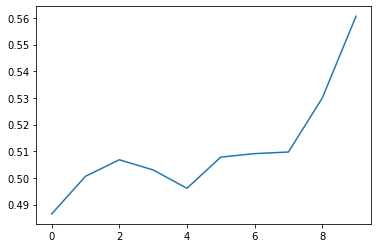

In [71]:
import matplotlib.pyplot as plt
plt.plot(h.history['acc'])
plt.show()

In [0]:
pred = model.predict([inputs])

In [0]:
max_prob_pred = np.argmax(pred[0])

In [0]:
for key,value in tokenizer.word_index.items():
   if val == max_prob_pred:
     k=key
